In [181]:
import numpy as np
import pandas as pd

In [182]:
data = pd.read_csv("/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,199,76,43,0,42.9,1.394,22,1
1,2,107,74,30,100,33.6,0.404,23,0
2,4,76,62,0,0,34.0,0.391,25,0
3,5,166,72,19,175,25.8,0.587,51,1
4,0,111,65,0,0,24.6,0.660,31,0


In [183]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,3.859375,120.109375,67.369792,18.765625,66.645833,31.343750,0.481875,32.213542,0.244792
std,3.204384,32.843170,20.304842,15.628617,108.035526,7.634371,0.328778,10.964542,0.431088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,99.000000,60.000000,0.000000,0.000000,26.600000,0.254000,24.000000,0.000000
50%,3.000000,114.000000,70.000000,20.000000,0.000000,31.200000,0.372000,28.000000,0.000000
75%,6.000000,137.250000,78.000000,32.000000,105.000000,35.550000,0.660000,39.000000,0.000000
max,13.000000,199.000000,114.000000,50.000000,680.000000,52.900000,1.893000,65.000000,1.000000


In [184]:
data.groupby('Outcome').size()

Outcome
0    145
1     47
dtype: int64

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

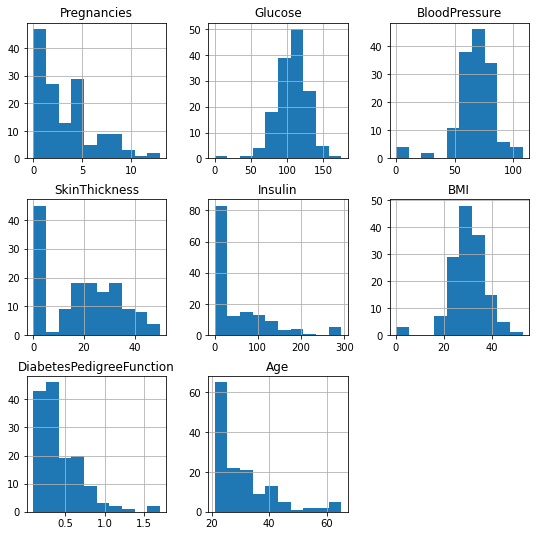

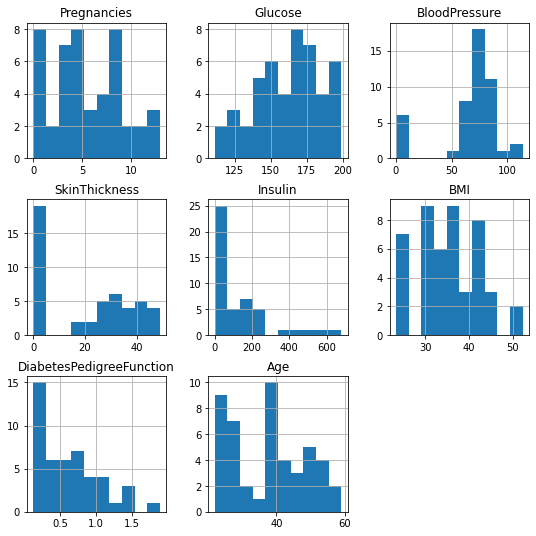

In [185]:
data.groupby('Outcome').hist(figsize=(9, 9))

In [32]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [186]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = data[feature_names]
y = data.Outcome

In [187]:
def sigmoid(input):    
    output = 1 / (1 + np.exp(-input))
    return output

In [188]:
def optimize(X, y,learning_rate,iterations,parameters):
  size = X.shape[0]
  weight = parameters["weight"] 
  bias = parameters["bias"]
  for i in range(iterations):
    sigma = sigmoid(np.dot(X, weight) + bias)
    loss = -1/size * np.sum(y * np.log(sigma)) + (1 - y) * np.log(1-sigma)
    dW = 1/size * np.dot(X.T, (sigma - y))
    db = 1/size * np.sum(sigma - y)
    weight -= learning_rate * dW
    bias -= learning_rate * db 
    parameters["weight"] = weight
    parameters["bias"] = bias
  return parameters

In [189]:
init_parameters = {} 
init_parameters["weight"] = np.zeros(X.shape[1])
init_parameters["bias"] = 0

In [190]:
def train(X, y, learning_rate,iterations):
    parameters_out = optimize(X, y, learning_rate, iterations ,init_parameters)
    return parameters_out

In [191]:
parameters_out = train(X, y, learning_rate = 0.6, iterations = 500)
parameters_out

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


{'bias': -12.541783576545477,
 'weight': array([ 5.37620959e+01,  4.57852072e+01, -5.12732223e+01, -1.58218784e+01,
         1.73523075e+01, -4.10028866e+01,  3.69149826e-01,  1.93861136e-02])}

In [192]:
output_values = np.dot(X, parameters_out["weight"]) + parameters_out["bias"]
predictions = sigmoid(output_values) >= 1/2
expected=y
print("RMS: %r " % np.sqrt(np.mean((predictions - expected) ** 2)))


RMS: 0.7288689868556626 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
